Group 18 Project Proposal
Title: Diabetes Data

Introduction: Our project explores diabetes diagnosis (regardless of type) in a sample of several hundred rural African-American patients. In our data set, diabetes is classified by hemoglobin A1 c levels that are equal to or greater than 6.5. Body Mass Index (BMI) and blood glucose levels are often good indicators of diabetes (Patel et al., 2023).

Question: Can we predict a patient's diabetes diagnosis based on their blood glucose level (mg/dL) and BMI (kg/m2)?

References:
Patel, B. J., Mehta, D. N., Vaghani, A., & Patel, K. (2023). Correlation of Body Mass Index (BMI) with Saliva and Blood Glucose Levels in Diabetic and Non-Diabetic Patients. Journal of pharmacy & bioallied sciences, 15(Suppl 2), S1204–S1207. https://doi.org/10.4103/jpbs.jpbs_159_23


In [1]:
library(rvest)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()         masks stats::filter()
✖ readr::guess_encoding() masks rvest::guess_encoding()
✖ dplyr::lag()            masks stats::lag()


In [2]:
#reading data
URL <- 'https://raw.githubusercontent.com/wmma2/group_18_project/main/diabetes.csv'
diabetes_data <- read_csv(URL)
diabetes_data

Rows: 403 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): location, gender, frame
dbl (16): id, chol, stab.glu, hdl, ratio, glyhb, age, height, weight, bp.1s,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000,203,82,56,3.6,4.31,Buckingham,46,female,62,121,medium,118,59,NA,NA,29,38,720
1001,165,97,24,6.9,4.44,Buckingham,29,female,64,218,large,112,68,NA,NA,46,48,360
1002,228,92,37,6.2,4.64,Buckingham,58,female,61,256,large,190,92,185,92,49,57,180
1003,78,93,12,6.5,4.63,Buckingham,67,male,67,119,large,110,50,NA,NA,33,38,480
1005,249,90,28,8.9,7.72,Buckingham,64,male,68,183,medium,138,80,NA,NA,44,41,300
1008,248,94,69,3.6,4.81,Buckingham,34,male,71,190,large,132,86,NA,NA,36,42,195
1011,195,92,41,4.8,4.84,Buckingham,30,male,69,191,medium,161,112,161,112,46,49,720
1015,227,75,44,5.2,3.94,Buckingham,37,male,59,170,medium,NA,NA,NA,NA,34,39,1020
1016,177,87,49,3.6,4.84,Buckingham,45,male,69,166,large,160,80,128,86,34,40,300


Download dataset
Upload to git
If URL starts with 
Click RAW - gives you CSV file as a text file 
Make it so it starts with 'raw'

stab.glu,glyhb,height_m,weight_kg,BMI,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
82,4.31,1.5748,54.88468,22.13096,no
97,4.44,1.6256,98.88314,37.41923,no
92,4.64,1.5494,116.11965,48.37028,no
93,4.63,1.7018,53.97749,18.63784,no
90,7.72,1.7272,83.00740,27.82477,yes
94,4.81,1.8034,86.18255,26.49935,no
92,4.84,1.7526,86.63614,28.20548,no
75,3.94,1.4986,77.11070,34.33549,no
87,4.84,1.7526,75.29633,24.51366,no


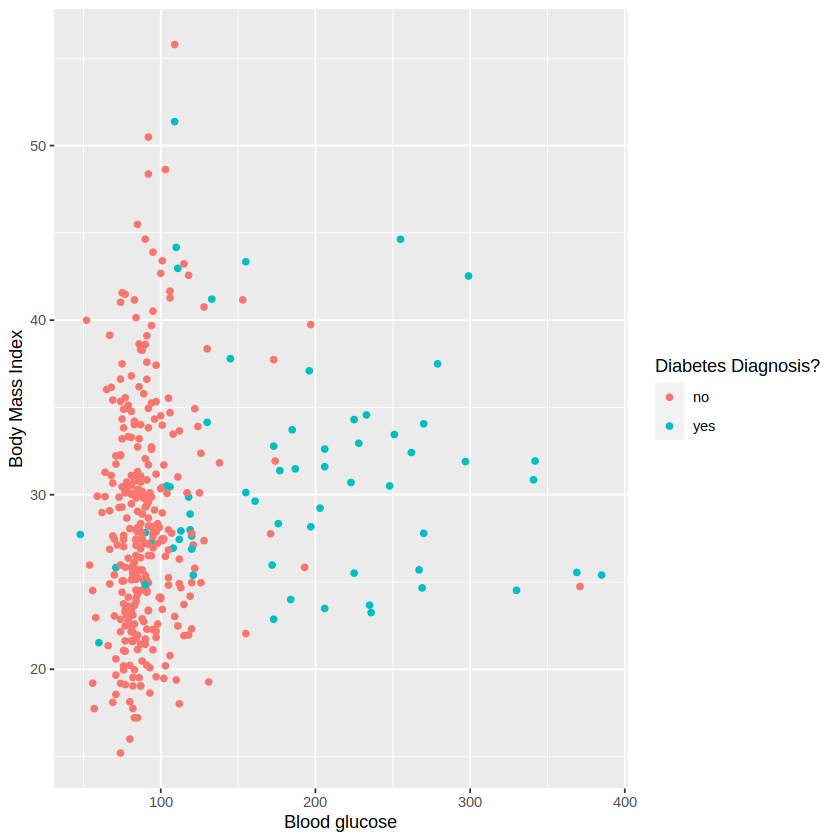

In [5]:
test <- diabetes_data |>
        mutate(diagnosis = if_else(glyhb > 6.5, "yes", "no")) |>
        mutate(height_m = height*0.0254, 
               weight_kg = weight*0.45359237,
               BMI = weight_kg/height_m^2) |>
        select(stab.glu, glyhb, height_m, weight_kg, BMI, diagnosis) |>
        filter(!is.na(glyhb + BMI))

test_plot <- test |>
    ggplot(aes(x = stab.glu, y = BMI, colour = diagnosis)) +
    geom_point() +
    labs(x = "Blood glucose", y = "Body Mass Index", colour = "Diabetes Diagnosis?") 
test_plot
test

if_else {dplyr},R Documentation
condition,A logical vector
"true, false","Vectors to use for TRUE and FALSE values of condition. Both true and false will be recycled to the size of condition. true, false, and missing (if used) will be cast to their common type."
missing,"If not NULL, will be used as the value for NA values of condition. Follows the same size and type rules as true and false."
...,These dots are for future extensions and must be empty.
ptype,"An optional prototype declaring the desired output type. If supplied, this overrides the common type of true, false, and missing."
size,"An optional size declaring the desired output size. If supplied, this overrides the size of condition."
